In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
data=pd.read_csv("/content/Add_sales_data_2018.csv")
data

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


In [43]:
data.isnull().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

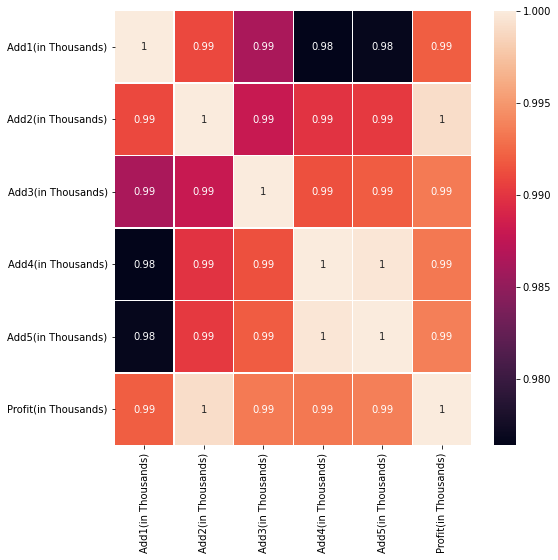

In [44]:
#First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.
data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True,linewidth=0.2)

positive correlation between between the amount spent for advertising through five different companies and profit generated

In [48]:
#2.Build a regression model to predict the profit from the given data and comment your findings on it.
data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

here the column date should be dropped.

In [49]:
y=data['Profit(in Thousands)']
x=data.drop(['Profit(in Thousands)','Date'],axis=1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)
print(y_test)
print(predictions)

153    5019.997
190    5917.925
33     4513.600
123    5238.366
130    4922.845
104    5518.561
147    5175.051
143    5134.657
60     5145.131
175    5784.540
105    5511.420
107    5452.280
116    5395.217
1      4042.448
88     4937.030
110    5511.087
167    5465.277
57     5071.736
162    5328.025
157    5263.935
169    5730.999
100    5131.898
45     4606.340
14     4379.901
17     4326.782
91     4836.837
166    5245.140
150    5216.436
37     4480.363
67     5001.615
201    5439.655
63     5250.775
179    6137.800
127    5188.139
158    5312.740
4      4350.683
164    4997.719
109    5577.150
5      4404.686
7      4470.775
25     4436.321
196    5676.934
184    5962.336
119    5227.886
204    5421.842
177    5910.980
138    5247.011
18     4190.965
198    5435.316
137    5051.755
145    5108.626
49     4643.716
Name: Profit(in Thousands), dtype: float64
[5019.997 5917.925 4513.6   5238.366 4922.845 5518.561 5175.051 5134.657
 5145.131 5784.54  5511.42  5452.28  5395.217 4042.4

In [50]:
from sklearn.metrics import mean_squared_error
print('MSE =',mean_squared_error(y_test,predictions))

MSE = 3.9768298680434024e-25


In [51]:
#3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.
input=[[290,312,309,298,320]]
result=model.predict(input)
print(result)

[5820.06]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
